## Validating Linear Regression Model

Once we are done with training our model, we just can’t assume that it is going to work well on data that it has not seen before. In other words, we cant be sure that the model will have the desired accuracy in production environment. For this, we need to validate our model. 

<b>To evaluate the performance of any machine learning model we need to test it on some unseen data.</b>

###  Cross validation (CV) 
CV is one of the technique used to test the effectiveness of a machine learning models.

<b>To perform CV we need to keep aside a sample/portion of the data on which is do not use to train the model, later us this sample for testing/validating.</b>

### Train_Test Split approach
In this approach we randomly split the data into training and test sets.
Next, we are training on the training set and use the test set for validation purpose.
Ideally split the data into `70:30` or `80:20`

### Example

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
df = pd.read_csv('house_data.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [47]:
X = df['sqft_living'].values.reshape(df.shape[0], 1)
Y = df['price'].values.reshape(df.shape[0], 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

print('total size %s\n'%len(X))
print('x_train size %s\n' % len(x_train))
print('y_train size %s\n' % len(y_train))

print('x_test size %s\n' % len(x_test))
print('y_test size %s\n' % len(y_test))



total size 99

x_train size 79

y_train size 79

x_test size 20

y_test size 20



In [48]:
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

r2 score: 0.41


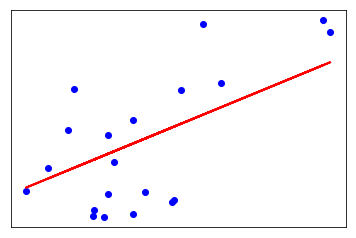

In [72]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
y_predict = np.array(lr.predict(x_test))

# Explained variance score: 1 is perfect prediction
print('r2 score: %.2f' % r2_score(y_test, y_predict))

plt.scatter(x_test, y_test,  color='blue')
plt.plot(x_test, y_predict, color='red', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()



## Exercise: create a better LR model using more features
to use more featurs just pass 2D array as x_train